<h2><b>[3주차 개인 과제]</b></h2>

<h3>Batch Gradient Descent, Stochastic Gradient Descent, Mini-batch Gradient에서 Gradient Update와 Loss function 계산이 어떻게 이뤄지는지를 코드 구현을 통해 이해해보고자 합니다!</h3>

[<h3>Hands on ML 4단원 ipynb</h3>](https://https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)

[<h3>Batch size, Iteration, epoch 개념 정리</h3>](https://losskatsu.github.io/machine-learning/epoch-batch/#2-batch-size%EC%9D%98-%EC%9D%98%EB%AF%B8)

<br>
<h2><b>[보충 설명]</b></h2>
<h3><b>Batch Gradient Descent</b></h3>

````
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
````

여기서 n_iterations는 n_epochs와 같은 의미로 쓰인 듯 합니다. Batch Gradient Descent는 전체 데이터를 사용해 학습하므로 1번의 epoch당 batch_size=m이고 iteration은 1번 일어나게 됩니다.

<h3><b>Stochastic Gradient Descent</b></h3>

````
for epoch in range(n_epochs):
	for i in range(m): 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
````
1번의 epoch당 batch_size=1이고 iteration은 m번 일어나는 것을 알 수 있습니다. 

<h3><b>Mini-Batch Gradient Descent</b></h3>

````
 for epoch in range(n_iterations):
	for i in range(0, m, minibatch_size):
````

1번의 epoch당 batch_size=minibatch_size이고 iteration은 m/minibatch_size번 일어나는 것을 알 수 있습니다. 여기서 n_iterations으로 표현하기보단 n_epochs가 더 적절할 듯 한데, 혹시 변수명 지정에 대해 이해하신 분은 제게 알려주시면 감사하겠습니다!

<br>
<h3><b>RMSE 구하는 법</b></h3>
<h3>구현된 코드에서 MSE와 Gradient의 계산식은 다음과 같습니다.</h4>
<h4>$\mathbf{X}: m \times n 행렬,\  \mathbf{y}: m \times 1 행렬,\ \mathbf{\theta}: 1 \times n 행렬$</h4>
<h4>$\mathbf{x^{(i)}}: 1 \times n 행렬,\  y^{(i)}: 스칼라,\ x_{j}^{(i)}: 스칼라$</h4>
<h3>$m: sample \ size, \ n: parameter \ 개수$

<br>
<br>
<h3>$ MSE = \frac{1}{m}\sum_{i=1}^m (\theta^{T}\mathbf{x}^{i}-y^{(i)})^{2}$</h3>
<h3>$ \frac{\partial MSE(\theta)}{\partial \theta_{j}} = \frac{2}{m}\sum_{i=1}^m (\theta^{T}\mathbf{x}^{i}-y^{(i)})x_{j}^{(i)}$</h3>
<h3>$\nabla_{\theta}MSE(\mathbf{\theta})=\begin{bmatrix}
\frac{\partial MSE(\theta)}{\partial \theta_{0}} \\
 \vdots \\
\frac{\partial MSE(\theta)}{\partial \theta_{n}}\\
\end{bmatrix}
=\frac{2}{m}\mathbf{X}^{T}(\mathbf{X}\mathbf{\theta}-\mathbf{y})$</h3>
<h3>주교재 예시 코드에서는 Gradient가 어떻게 업데이트되는지 알아봤다면, 이번 과제에서 우리는 loss metric으로 가장 많이 사용되는 지표 중 하나인 RMSE(Root Mean Squared Error)를 구하고 학습이 진행됨에 따라 나타나는 변화를 관측하고자 합니다.</h3>
<h4>$ RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m (\theta^{T}\mathbf{x}^{i}-y^{(i)})^{2}}$</h4>

<br>
<h2><b>[문제]</b></h2>
<h3> 0. 각 방법에서 학습 횟수(sgd: n_epochs, bgd와 mgd: n_iterations)는 50으로 고정해주세요.</h3>

<h3>1. Batch Gradient Descent에서 구현된 코드를 이해해보고, 제시된 plot_loss 함수를 사용해 $\eta=0.02, 0.1, 0.5$일 때 loss_path_bgd를 subplot을 사용해 그려보고, $\eta= 0.1$ 일 때 loss_path_bgd_plot을 loss_path_bgd에 저장하시오.</h3>

<h3>2. 제시된 코드를 참고해 Stochastic Gradient Descent, Mini-batch Gradient에서 loss_path_sgd, loss_path_mgd를 구해 그래프를 그리고, loss_path_bdg, loss_path_sgd, loss_path_mgd를 비교하는 그래프를 그리시오.</h3>

<br>
<h3> 코드 작성이 보다 원활하도록 설명이 적힌 주석 앞에 한 줄씩 코드를 채워넣는 방식으로 문제를 출제했습니다. 만일 제가 작성한 코드가 불편하다면, 본인만의 코드를 작성하고 이에 따른 적절한 설명을 주석으로 달아주시면 감사하겠습니다 :)</h3>






# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Dataset

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

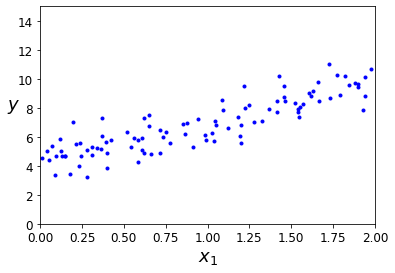

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

# Batch Gradient Descent 구현 예시

In [ ]:
eta = 0.1  # learning rate
n_iterations = 50 # n_iterations 변경

m = 100

theta = np.random.randn(2,1)  # random initialization

loss_bgd = []
for iteration in range(n_iterations):
    loss = np.sqrt((1/m)*(X_b.dot(theta)-y).T.dot(X_b.dot(theta)-y).squeeze()) # RMSE 계산. squeeze는 array를 scalar로 변환하기 위함.
    loss_bgd.append(loss)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

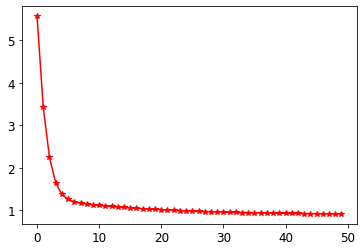

In [ ]:
plt.plot(loss_bgd, marker = '*', color = 'r')

# Batch Gradient Descent with different $\eta$


In [ ]:
loss_path_bgd = [] # loss_path_bgd 생성

def plot_loss(theta, eta, loss_path=None):
    m = len(X_b)
    n_iterations = 50
    loss_path_bgd_plot = [] # plot용 loss_path_bgd 생성
    for iteration in range(n_iterations):
        loss = np.sqrt((1/m)*(X_b.dot(theta)-y).T.dot(X_b.dot(theta)-y).squeeze()) # RMSE, squeeze는 array를 scalar변환하기 위함
        loss_path_bgd_plot.append(loss) # RMSE를 loss_path_bgd_plot에 저장
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if loss_path is not None: # loss_path를 지정할 경우
            loss_path.append(loss) # loss_path_bgd_plot를 loss_path에 저장
    plt.plot(loss_path_bgd_plot, marker = '*', color = 'r') # loss function 그리기
    plt.xlabel("$n\_iterations$", fontsize=12)
    plt.axis([0, 50, 0, 20])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

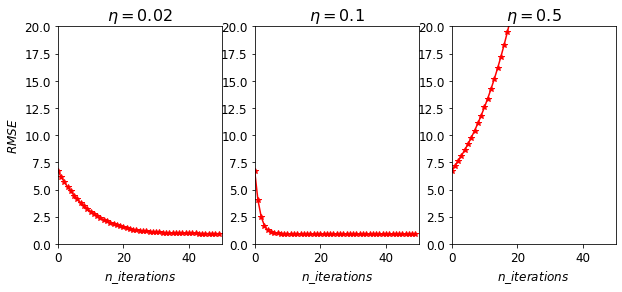

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(1,3,1);
plot_loss(theta, 0.02, loss_path=None)
# eta=0.02일 때 plot_loss
plt.ylabel("$RMSE$", rotation=90, fontsize=12)
plt.subplot(1,3,2);
plot_loss(theta, 0.1,loss_path=None)
# eta=0.1일 때 plot_loss, loss_path를 loss_path_bgd에 저장하기.
plt.subplot(1,3,3);
plot_loss(theta, 0.5, loss_path = None)
# eta=0.5일 때 plot_loss
plt.show()

# Stochastic Gradient Descent

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
print(m)

100


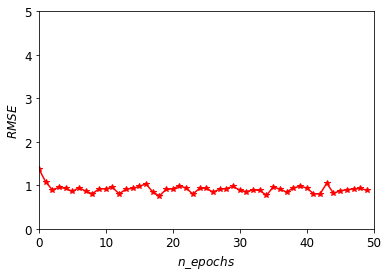

In [ ]:
import math
n_epochs = 50

t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1) 

theta = np.random.randn(2,1)  # random initialization
loss_path_sgd = []
# loss_path_sgd 리스트 생성
for epoch in range(n_epochs):
    loss_i =[]
    # RMSE 계산을 위해 개별 잔차제곱값을 저장할 리스트 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        loss_i.append((xi.dot(theta)-yi).T.dot(xi.dot(theta)-yi))
        # 잔차제곱값을 loss_i에 저장
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    loss_path_sgd.append(np.sqrt(np.mean(loss_i)))
    # 잔차제곱값을 평균 후 loss_path_sgd에 저장.

plt.plot(loss_path_sgd, marker = '*', color = 'r')
plt.xlabel("$n\_epochs$", fontsize=12)                     # not shown
plt.ylabel("$RMSE$", rotation=90, fontsize=12)           # not shown
plt.axis([0, 50, 0, 5])                              # not shown
plt.show()                                           # not shown

# Mini-batch Gradient Descent

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
loss_path_mgd =[]
# loss_path_mgd 리스트 생성

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    loss_ii =[]
    # mini_batch당 계산되는 loss(잔차제곱합) 저장하는 리스트 생성
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        loss3 = np.sum((xi.dot(theta)-yi).T.dot(xi.dot(theta)-yi).squeeze())
        loss_ii.append(loss3)
        # mini_batch당 loss(잔차제곱합) 저장 
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    loss4 = np.sqrt((minibatch_size/m)*sum(loss_ii))
    loss_path_mgd.append(loss4)
    # 미니 batch 당 잔차제곱합을 모두 받아 RMSE 계산 뒤 loss_path_mgd에 저장

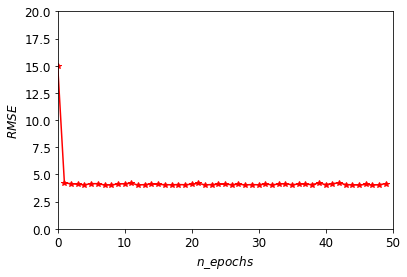

In [ ]:
plt.plot(loss_path_mgd, marker = '*', color = 'r')
# loss_path_mgd 그리기
plt.xlabel("$n\_epochs$", fontsize=12)                     # not shown
plt.ylabel("$RMSE$", rotation=90, fontsize=12)           # not shown
plt.axis([0, 50, 0, 20])                              # not shown
plt.show()  

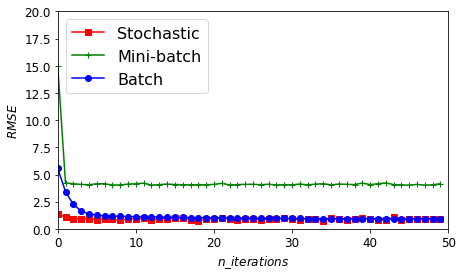

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(loss_path_sgd, marker = 's', color = 'r', label = 'Stochastic')
plt.plot(loss_path_mgd, marker = '+', color = 'g', label = 'Mini-batch')
plt.plot(loss_bgd, marker = 'o', color = 'b', label = 'Batch')
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$n\_iterations$", fontsize=12)
plt.ylabel(r"$RMSE$", fontsize=12, rotation=90)
plt.axis([0, 50, 0, 20])
plt.show()